In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# Importations
import matplotlib.pyplot as plt
import seaborn as sns
import torch

from torch.utils.data import DataLoader, BatchSampler, random_split

from src.covid_cytof_dataset import CovidCytofDataset
from src.models.simple_nn import SimpleNeuralNetwork
from src.trainer import Trainer
from itertools import chain
from torch import nn


sns.set_theme()

In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
# device = "cpu"
print(f"Using {device} device")

In [79]:
BATCH_SIZE = 100

In [80]:
data = CovidCytofDataset("./data/attachments/COVID_CYTOF_BASIC_METADATA_STATUS_AGE_GROUP_SEX.xlsx", "./data", BATCH_SIZE)

/home/evann/.cache/pypoetry/virtualenvs/covid-cytof-NoJZp_V7-py3.10/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Loading fcs data:


100%|██████████| 99/99 [01:00<00:00,  1.64it/s]

done


In [82]:
train_data, test_data = random_split(list(BatchSampler(data, batch_size=BATCH_SIZE, drop_last=False)), [0.8, 0.2])
train_data, test_data = list(chain.from_iterable(train_data)), list(chain.from_iterable(test_data))

train_dataloader = DataLoader(train_data, batch_size=1, shuffle=False)
test_dataloader = DataLoader(test_data, batch_size=1, shuffle=False)

# train_dataloader.dataset[0].shape


# del train_data, test_data

In [83]:
model = SimpleNeuralNetwork(data.data.shape[1], 500, 1).to(device)
print(model)

SimpleNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=61, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [84]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)


trainer = Trainer(model, optimizer, loss_fn, device, epochs=20)

In [85]:
trainer.run(train_dataloader, test_dataloader)

/home/evann/.cache/pypoetry/virtualenvs/covid-cytof-NoJZp_V7-py3.10/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Train Epoch: 1 [0/8000 (0%)]	Loss: 0.258013
Train Epoch: 1 [100/8000 (1%)]	Loss: 0.147977
Train Epoch: 1 [200/8000 (2%)]	Loss: 0.068681
Train Epoch: 1 [300/8000 (4%)]	Loss: 0.101873
Train Epoch: 1 [400/8000 (5%)]	Loss: 0.051848
Train Epoch: 1 [500/8000 (6%)]	Loss: 0.029636
Train Epoch: 1 [600/8000 (8%)]	Loss: 0.491595
Train Epoch: 1 [700/8000 (9%)]	Loss: 0.134082
Train Epoch: 1 [800/8000 (10%)]	Loss: 0.097103
Train Epoch: 1 [900/8000 (11%)]	Loss: 0.554003
Train Epoch: 1 [1000/8000 (12%)]	Loss: 0.505815
Train Epoch: 1 [1100/8000 (14%)]	Loss: 0.274790
Train Epoch: 1 [1200/8000 (15%)]	Loss: 0.309608
Train Epoch: 1 [1300/8000 (16%)]	Loss: 0.131696
Train Epoch: 1 [1400/8000 (18%)]	Loss: 0.360399
Train Epoch: 1 [1500/8000 (19%)]	Loss: 0.171096
Train Epoch: 1 [1600/8000 (20%)]	Loss: 0.240558
Train Epoch: 1 [1700/8000 (21%)]	Loss: 0.181845
Train Epoch: 1 [1800/8000 (22%)]	Loss: 0.086980
Train Epoch: 1 [1900/8000 (24%)]	Loss: 0.030568
Train Epoch: 1 [2000/8000 (25%)]	Loss: 0.034542
Train Epoch:

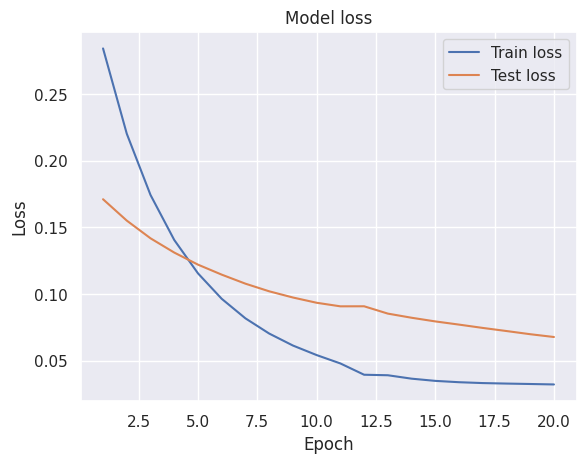

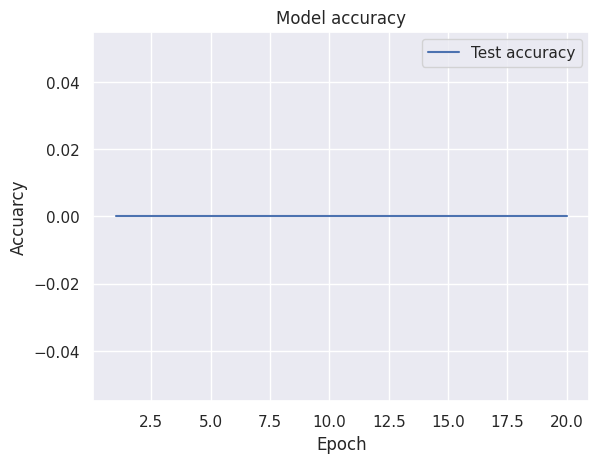

In [86]:
trainer.plot_loss()
trainer.plot_accuracy()